<a href="https://colab.research.google.com/github/ViraMeliana/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

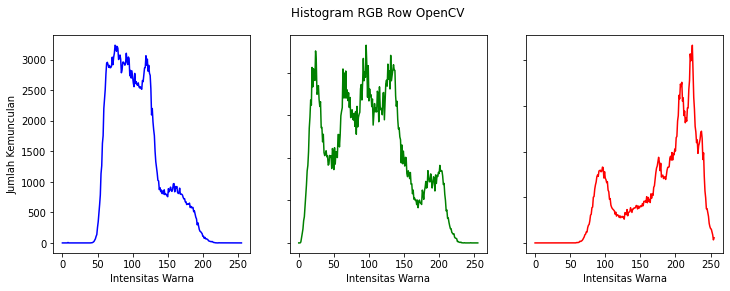

In [4]:
img = cv.imread('/content/drive/MyDrive/lenna.png')
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Histogram RGB Row OpenCV')
color = ('b', 'g', 'r')
cl = 0

for i, col in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    axs[cl].plot(hist, color=col)
    # plt.xlim([0, 256])
    cl += 1
for ax in axs.flat:
    ax.set(xlabel='Intensitas Warna', ylabel='Jumlah Kemunculan')
for ax in axs.flat:
    ax.label_outer()

plt.show()

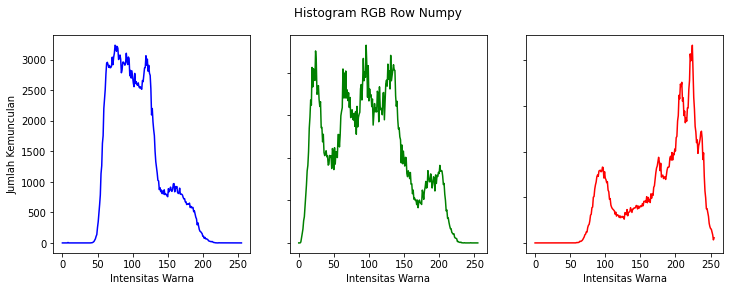

In [5]:
img = cv.imread('/content/drive/MyDrive/lenna.png')
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Histogram RGB Row Numpy')
color = ('b', 'g', 'r')
cl = 0

for i, col in enumerate(color):
    histogram, bin_edges = np.histogram(
        img[:, :, i], bins=256, range=(0, 256)
    )
    axs[cl].plot(bin_edges[0:-1], histogram, color=col)
    cl += 1
for ax in axs.flat:
    ax.set(xlabel='Intensitas Warna', ylabel='Jumlah Kemunculan')
for ax in axs.flat:
    ax.label_outer()

plt.show()

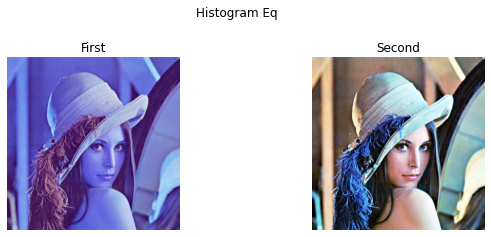

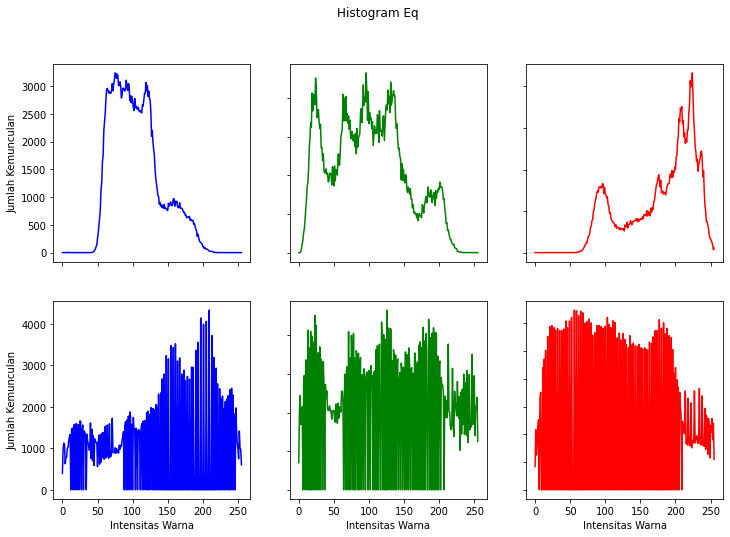

In [8]:
img = cv.imread('/content/drive/MyDrive/lenna.png')
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Histogram Eq')
rows = 2
columns = 2

b,g,r = cv.split(img)
output1_r = cv.equalizeHist(r)
output1_g = cv.equalizeHist(g)
output1_b = cv.equalizeHist(b)
equ = cv.merge((output1_r, output1_g, output1_b))

fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(equ)
plt.axis('off')
plt.title("Second")
plt.show()

fig2, axs2 = plt.subplots(2, 3, figsize=(12, 8))
fig2.suptitle('Histogram Eq')
color = ('b', 'g', 'r')
cl = 0

for i, col in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    hist2 = cv.calcHist([equ], [i], None, [256], [0, 256])
    axs2[0, cl].plot(hist, color=col)
    axs2[1, cl].plot(hist2, color=col)
    cl += 1

for ax in axs2.flat:
    ax.set(xlabel='Intensitas Warna', ylabel='Jumlah Kemunculan')

for ax in axs2.flat:
    ax.label_outer()

plt.show()


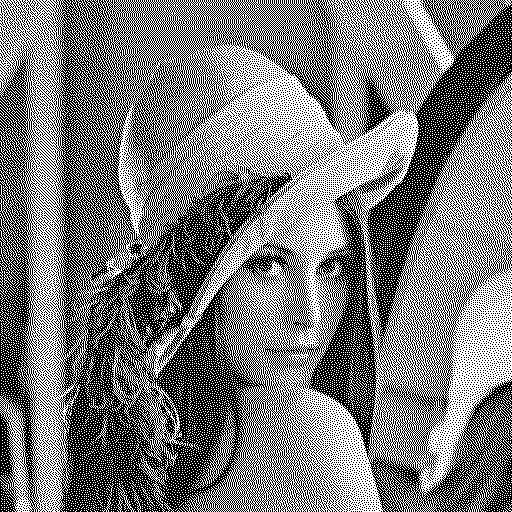

In [19]:
from PIL import Image
import cv2
import numpy as np

Image = cv2.imread('/content/drive/MyDrive/lenna.png')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/lenna.png', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/lenna.png', GrayImage)
cv2_imshow(GrayImage)